<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>  Extracting and visualizing stock data is a fundamental task in financial analysis and data science. This process involves retrieving historical and real-time stock market data from various sources and using visualization techniques to analyze and interpret the data.

#### Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [5]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla_data = yf.download('TSLA', start='2023-01-01', end='2024-01-01')

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())

# Save the DataFrame to a CSV file
tesla_data.to_csv('tesla_data.csv', index=False)


[*********************100%%**********************]  1 of 1 completed

        Date        Open        High         Low       Close   Adj Close  \
0 2023-01-03  118.470001  118.800003  104.639999  108.099998  108.099998   
1 2023-01-04  109.110001  114.589996  107.519997  113.639999  113.639999   
2 2023-01-05  110.510002  111.750000  107.160004  110.339996  110.339996   
3 2023-01-06  103.000000  114.389999  101.809998  113.059998  113.059998   
4 2023-01-09  118.959999  123.519997  117.110001  119.769997  119.769997   

      Volume  
0  231402800  
1  180389000  
2  157986300  
3  220911100  
4  190284000  


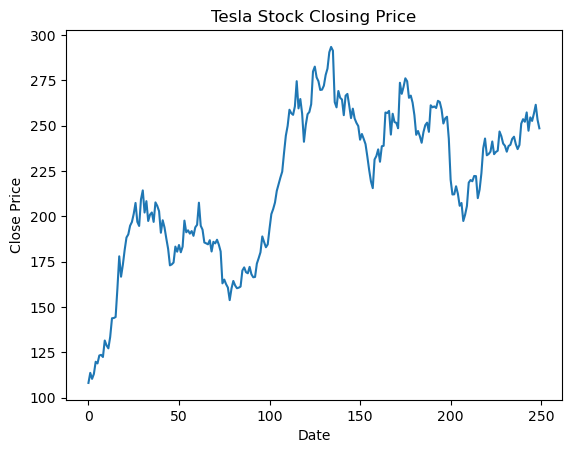

In [6]:
import matplotlib.pyplot as plt

# Plot the closing price
tesla_data['Close'].plot(title='Tesla Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


## Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.



In [14]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

In [15]:
soup = BeautifulSoup(html_data, "html5lib")
print(soup.prettify())

<html>
 <head>
 </head>
 <body>
  <div style="margin: 50px auto; width: 50%; border: 1px solid #dfdfdf; padding: 20px 50px 30px 50px; font-family:helvetica;">
   <h1>
    We do not allow automated access to our servers.
   </h1>
   <h2>
    <p>
     Automated access to our data is prohibited by our data provider.
    </p>
    <p>
     If you are a user attempting to access the site via a browser, please follow this process to regain access:
    </p>
    <ul>
     <li>
      Go to
      <a href="https://whatismyipaddress.com/" rel="noopener noreferrer" target="_blank">
       whatismyipaddress
      </a>
      and obtain your IPv4 address
     </li>
     <li>
      Email us your IPv4 address at
      <a class="__cf_email__" data-cfemail="4821262e270825292b3a273c3a2d262c3b66262d3c" href="/cdn-cgi/l/email-protection">
       [email protected]
      </a>
     </li>
     <li>
      We will add you to our whitelist within 24 hours
     </li>
    </ul>
   </h2>
  </div>
  <script data-cfasync

In [16]:
tesla_revenue = pd.DataFrame(columns = ["Date","Revenue"])

for table in soup.find_all('table'):
    if table.find('th').getText().startswith("Tesla Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2: continue
            Date = col[0].text
            Revenue = col[1].text.replace("$","").replace(",","")
               
            tesla_revenue = tesla_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)


In [17]:
tesla_revenue.dropna(axis=0, how='all', subset=['Revenue']) #drop NaN values
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""] #drop empty string values

In [13]:
tesla_revenue.tail(5)

,Date,Revenue


## Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [18]:
import yfinance as yf
import pandas as pd

# Download GameStop stock data
gme_data = yf.download('GME', start='2023-01-01', end='2024-01-01')

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())

# Save the DataFrame to a CSV file
gme_data.to_csv('gme_data.csv', index=False)


[*********************100%%**********************]  1 of 1 completed

        Date       Open       High        Low      Close  Adj Close   Volume
0 2023-01-03  18.639999  19.260000  17.090000  17.200001  17.200001  5135200
1 2023-01-04  17.250000  17.930000  16.900000  17.320000  17.320000  3939300
2 2023-01-05  17.059999  17.260000  15.890000  16.219999  16.219999  6066200
3 2023-01-06  16.000000  16.570000  15.410000  16.459999  16.459999  4823400
4 2023-01-09  16.650000  17.129999  16.360001  16.379999  16.379999  3522600


## Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [20]:
gme = yf.Ticker('GME')
gme_data = gme.history(period = "max")


In [21]:
gme_data.reset_index(inplace=True)
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data
Use the requests library to download the webpage https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue. Save the text of the response as a variable named html_data.

In [22]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

In [23]:
soup = BeautifulSoup(html_data, "html5lib")
print(soup.prettify())

<html>
 <head>
 </head>
 <body>
  <div style="margin: 50px auto; width: 50%; border: 1px solid #dfdfdf; padding: 20px 50px 30px 50px; font-family:helvetica;">
   <h1>
    We do not allow automated access to our servers.
   </h1>
   <h2>
    <p>
     Automated access to our data is prohibited by our data provider.
    </p>
    <p>
     If you are a user attempting to access the site via a browser, please follow this process to regain access:
    </p>
    <ul>
     <li>
      Go to
      <a href="https://whatismyipaddress.com/" rel="noopener noreferrer" target="_blank">
       whatismyipaddress
      </a>
      and obtain your IPv4 address
     </li>
     <li>
      Email us your IPv4 address at
      <a class="__cf_email__" data-cfemail="4821262e270825292b3a273c3a2d262c3b66262d3c" href="/cdn-cgi/l/email-protection">
       [email protected]
      </a>
     </li>
     <li>
      We will add you to our whitelist within 24 hours
     </li>
    </ul>
   </h2>
  </div>
  <script data-cfasync

In [27]:
gme_revenue = pd.DataFrame(columns = ["Date","Revenue"])

for table in soup.find_all('table'):
    if table.find('th').getText().startswith("GameStop Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2: continue
            Date = col[0].text
            Revenue = col[1].text.replace("$","").replace(",","")
               
            gme_revenue = gme_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

In [28]:
gme_revenue.tail(5)

,Date,Revenue


## Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

In [29]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

NameError: name 'make_graph' is not defined

## Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

[*********************100%%**********************]  1 of 1 completed


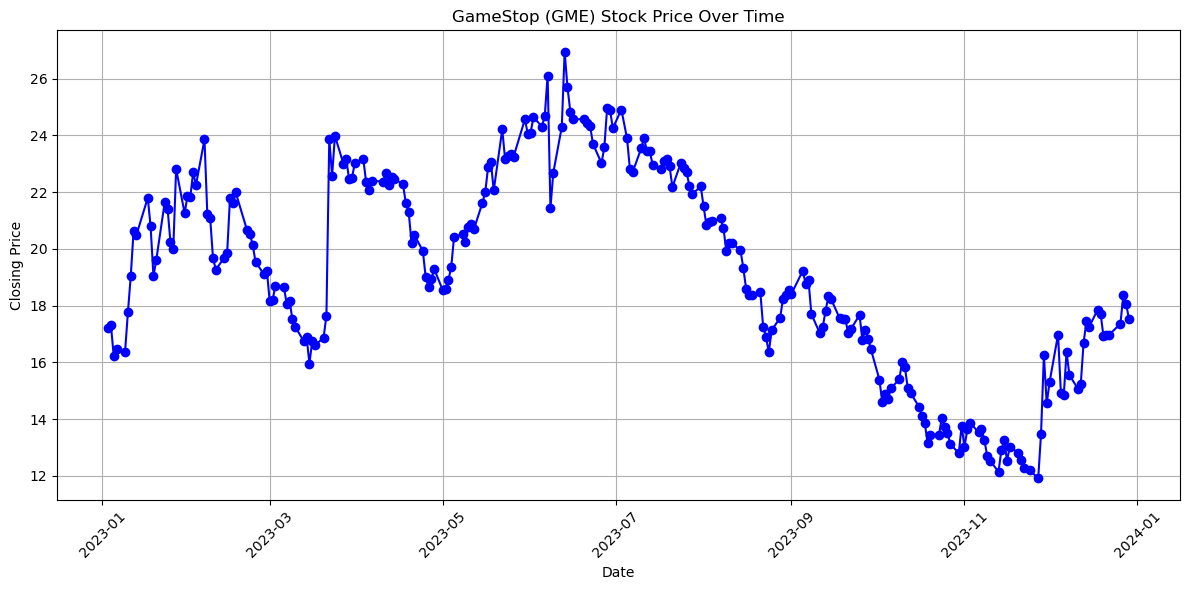

In [30]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download GameStop stock data
gme_data = yf.download('GME', start='2023-01-01', end='2024-01-01')

# Reset the index
gme_data.reset_index(inplace=True)

# Define the make_graph function
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], marker='o', linestyle='-', color='b')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title(title)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot GameStop stock data
make_graph(gme_data, 'GameStop (GME) Stock Price Over Time')
